# Homework 4 - Dario Placencio

In [40]:
# import the necessary packages
import numpy as np
import pandas as pd
import os 
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.io as pio

### 3 - Language Identification with Naive Bayes

1. Use files 0.txt to 9.txt in each language as the training data.
Estimate the prior probabilities 
$\hat p(y=e)$,
$\hat p(y=j)$,
$\hat p(y=s)$
using additive smoothing with parameter $\frac{1}{2}$. 
Give the formula for additive smoothing with parameter $\frac{1}{2}$ in this case. 
Print and include in final report the prior probabilities.
(Hint: Store all probabilities here and below in $\log()$ internally to avoid underflow. This also means you need to do arithmetic in log-space.  But answer questions with probability, not log probability.)


In [2]:
# Adjust the extract_path to point directly to the languageID folder
extract_path = 'languageID'

In [3]:
# Read the contents of the training files
def read_files(lang, start, end):
    """Read files for a given language between start and end indices."""
    contents = ""
    for i in range(start, end + 1):
        with open(os.path.join(extract_path, f"{lang}{i}.txt"), 'r', errors='ignore') as f:
            contents += f.read()
    return contents

# Extract training data for each language
english_train = read_files('e', 0, 9)
spanish_train = read_files('s', 0, 9)
japanese_train = read_files('j', 0, 9)

len(english_train), len(spanish_train), len(japanese_train)

(15339, 16500, 15496)

In [4]:
# Given data and smoothing parameters
N_y = 10  # Number of English training documents
N = 30   # Total number of training documents
alpha = 0.5  # Smoothing parameter
V = 3  # Number of classes (languages)

# Compute smoothed prior probability for English
p_e_smoothed = (N_y + alpha) / (N + alpha * V)
p_e_smoothed

0.3333333333333333

In [5]:
# Store as log probabilities
p_e_smoothed = np.log(p_e_smoothed)

In [6]:
# Compute smoothed prior probability for Spanish
p_s_smoothed = (N_y + alpha) / (N + alpha * V)
p_s_smoothed

0.3333333333333333

In [7]:
# Store as log probabilities
p_s_smoothed = np.log(p_s_smoothed)

In [8]:
# Compute smoothed prior probability for Japanese
p_j_smoothed = (N_y + alpha) / (N + alpha * V)
p_j_smoothed

0.3333333333333333

In [9]:
# Store as log probabilities
p_j_smoothed = np.log(p_j_smoothed)

2. Using the same training data, estimate the class conditional probability (multinomial parameter) for English $\theta_{i,e} := \hat p(c_i \mid y=e)$ where $c_i$ is the $i$-th character. That is, $c_1 = a, \ldots, c_{26} = z, c_{27} = space$. 

Again use additive smoothing with parameter $\frac{1}{2}$. Give the formula for additive smoothing with parameter $\frac{1}{2}$ in this case. 

Print $\theta_e$ and include in final report which is a vector with 27 elements.

In [10]:
from collections import defaultdict

# Function to count the frequency of each character in a given text
def char_frequencies(text):
    freq = defaultdict(int)
    for char in text:
        # Only consider lowercase alphabets and space
        if char in 'abcdefghijklmnopqrstuvwxyz ':
            freq[char] += 1
    return freq

# Assuming english_train contains the combined content of English training files
english_freq = char_frequencies(english_train)

# Compute the total number of characters in the English training data
total_english_chars = sum(english_freq.values())

# Vocabulary
vocabulary = 'abcdefghijklmnopqrstuvwxyz '

# Smoothing parameter
alpha = 0.5

# Compute the class conditional probabilities for English
theta_e = {}
for char in vocabulary:
    theta_e[char] = (english_freq[char] + alpha) / (total_english_chars + alpha * len(vocabulary))

print(theta_e)

{'a': 0.0601685114819098, 'b': 0.011134974392863043, 'c': 0.021509995043779945, 'd': 0.021972575582355856, 'e': 0.1053692383941847, 'f': 0.018932760614571286, 'g': 0.017478936064761277, 'h': 0.047216256401784236, 'i': 0.055410540227986124, 'j': 0.001420783082768875, 'k': 0.0037336857756484387, 'l': 0.028977366595076822, 'm': 0.020518751032545846, 'n': 0.057921691723112505, 'o': 0.06446390219725756, 'p': 0.01675202378985627, 'q': 0.0005617049396993227, 'r': 0.053824549810011564, 's': 0.06618205848339666, 't': 0.08012555757475633, 'u': 0.026664463902197257, 'v': 0.009284652238559392, 'w': 0.015496448042293078, 'x': 0.001156451346439782, 'y': 0.013844374690236246, 'z': 0.0006277878737815959, ' ': 0.1792499586981662}


In [11]:
# Store as log probabilities
for char in vocabulary:
    theta_e[char] = np.log(theta_e[char])

3. Print $\theta_j, \theta_s$ and include in final report the class conditional probabilities for Japanese and Spanish.

In [12]:
# Compute character frequencies for Japanese and Spanish
japanese_freq = char_frequencies(japanese_train)
spanish_freq = char_frequencies(spanish_train)

# Compute the total number of characters in the Japanese and Spanish training data
total_japanese_chars = sum(japanese_freq.values())
total_spanish_chars = sum(spanish_freq.values())

# Compute the class conditional probabilities for Japanese
theta_j = {}
for char in vocabulary:
    theta_j[char] = (japanese_freq[char] + alpha) / (total_japanese_chars + alpha * len(vocabulary))

# Compute the class conditional probabilities for Spanish
theta_s = {}
for char in vocabulary:
    theta_s[char] = (spanish_freq[char] + alpha) / (total_spanish_chars + alpha * len(vocabulary))

print("Theta_j:", theta_j)
print("Theta_s:", theta_s)

Theta_j: {'a': 0.1317656102589189, 'b': 0.010866906600510151, 'c': 0.005485866033054963, 'd': 0.01722631818022992, 'e': 0.06020475907613823, 'f': 0.003878542227191726, 'g': 0.014011670568503443, 'h': 0.03176211607673224, 'i': 0.09703343932352633, 'j': 0.0023411020650616725, 'k': 0.05740941332681086, 'l': 0.001432614696530277, 'm': 0.03979873510604843, 'n': 0.05671057688947902, 'o': 0.09116321324993885, 'p': 0.0008735455466648031, 'q': 0.00010482546559977637, 'r': 0.04280373178657535, 's': 0.0421747789929767, 't': 0.056990111464411755, 'u': 0.07061742199238269, 'v': 0.0002445927530661449, 'w': 0.01974212935462455, 'x': 3.4941821866592126e-05, 'y': 0.01415143785596981, 'z': 0.00772214263251686, ' ': 0.12344945665466997}
Theta_s: {'a': 0.10456045141993771, 'b': 0.008232863618143134, 'c': 0.03752582405722919, 'd': 0.039745922111559924, 'e': 0.1138108599796491, 'f': 0.00860287996053159, 'g': 0.0071844839813758445, 'h': 0.0045327001942585795, 'i': 0.049859702136844375, 'j': 0.006629459467793

In [13]:
# Store as log probabilities
for char in vocabulary:
    theta_j[char] = np.log(theta_j[char])
    theta_s[char] = np.log(theta_s[char])

4. Treat e10.txt as a test document $x$. Represent $x$ as a bag-of-words count vector (Hint: the vocabulary has size 27).

Print the bag-of-words vector $x$ and include in final report.

In [14]:
# Read the content of e10.txt
with open('languageID/e10.txt', 'r', errors='ignore') as f:
    test_content = f.read()

# Compute character frequencies for the test content
test_freq = char_frequencies(test_content)

# Create the bag-of-words vector
bow_vector = [test_freq[char] for char in vocabulary]

print("Bag-of-Words Vector:", bow_vector)

Bag-of-Words Vector: [164, 32, 53, 57, 311, 55, 51, 140, 140, 3, 6, 85, 64, 139, 182, 53, 3, 141, 186, 225, 65, 31, 47, 4, 38, 2, 498]


5. Compute $\hat p(x \mid y)$ for $y=e, j, s$ under the multinomial model assumption, respectively. Use the formula
$\hat p(x \mid y) = \prod_{i=1}^d \theta_{i, y}^{x_i}$ where $x=(x_1, \ldots, x_d)$.

Show the three values: $\hat p(x \mid y=e), \hat p(x \mid y=j), \hat p(x \mid y=s)$.

Hint: you may notice that we omitted the multinomial coefficient.  This is ok for classification because it is a constant w.r.t. $y$.

In [15]:
import math

# Function to compute the log-probability log(p(x|y)) for a given language and its log(theta) values
def compute_log_probability(bow_vector, log_theta_values):
    log_prob = 0  
    for xi, char in zip(bow_vector, vocabulary):
        log_prob += xi * log_theta_values[char]
    return log_prob

# Compute log(p(x|y)) for each language
log_p_x_given_e = compute_log_probability(bow_vector, theta_e)
log_p_x_given_j = compute_log_probability(bow_vector, theta_j)
log_p_x_given_s = compute_log_probability(bow_vector, theta_s)

print("log(p(x|y=e)):", log_p_x_given_e)
print("log(p(x|y=j)):", log_p_x_given_j)
print("log(p(x|y=s)):", log_p_x_given_s)

log(p(x|y=e)): -7841.865447060635
log(p(x|y=j)): -8771.433079075032
log(p(x|y=s)): -8467.282044010557


In [16]:
# Convert the log probabilities back to regular probabilities
p_x_given_e = math.exp(log_p_x_given_e)
p_x_given_j = math.exp(log_p_x_given_j)
p_x_given_s = math.exp(log_p_x_given_s)

print("p(x|y=e):", p_x_given_e)
print("p(x|y=j):", p_x_given_j)
print("p(x|y=s):", p_x_given_s)

p(x|y=e): 0.0
p(x|y=j): 0.0
p(x|y=s): 0.0


In [17]:
# Print p_x_given_e, p_x_given_j, and p_x_given_s with 10 decimal places
print("p(x|y=e): {:.10f}".format(p_x_given_e))
print("p(x|y=j): {:.10f}".format(p_x_given_j))
print("p(x|y=s): {:.10f}".format(p_x_given_s))

p(x|y=e): 0.0000000000
p(x|y=j): 0.0000000000
p(x|y=s): 0.0000000000


6. Use Bayes rule and your estimated prior and likelihood, compute the posterior $\hat p(y \mid x)$.

Show the three values: $\hat p(y=e \mid x), \hat p(y=j \mid x), \hat p(y=s \mid x)$.

Show the predicted class label of $x$.

In [18]:
# Compute log posterior for each language using the log priors
log_posterior_e = log_p_x_given_e + p_e_smoothed
log_posterior_j = log_p_x_given_j + p_j_smoothed
log_posterior_s = log_p_x_given_s + p_s_smoothed

# Normalize log posteriors by subtracting the max value among them
max_log_posterior = max(log_posterior_e, log_posterior_j, log_posterior_s)

# Convert normalized log posteriors back to regular probabilities
posterior_e = math.exp(log_posterior_e - max_log_posterior)
posterior_j = math.exp(log_posterior_j - max_log_posterior)
posterior_s = math.exp(log_posterior_s - max_log_posterior)

# Normalize the posteriors to sum to 1
normalizing_factor = posterior_e + posterior_j + posterior_s
normalized_posterior_e = posterior_e / normalizing_factor
normalized_posterior_j = posterior_j / normalizing_factor
normalized_posterior_s = posterior_s / normalizing_factor

# Determine the predicted class label
predicted_class_label = max([('e', normalized_posterior_e), ('j', normalized_posterior_j), ('s', normalized_posterior_s)], key=lambda x: x[1])[0]

print("p(y=e|x):", normalized_posterior_e)
print("p(y=j|x):", normalized_posterior_j)
print("p(y=s|x):", normalized_posterior_s)
print("Predicted class label:", predicted_class_label)

p(y=e|x): 1.0
p(y=j|x): 0.0
p(y=s|x): 2.4267389118368303e-272
Predicted class label: e


7. Evaluate the performance of your classifier on the test set (files 10.txt to 19.txt in three languages).

Present the performance using a confusion matrix. A confusion matrix summarizes the types of errors your classifier makes, as shown in the table below.   The columns are the true language a document is in, and the rows are the classified outcome of that document.  The cells are the number of test documents in that situation.  For example, the cell with row = English and column = Spanish contains the number of test documents that are really Spanish, but misclassified as English by your classifier.

In [19]:
def predict_language(document):
    bow_vector = [document.count(char) for char in vocabulary]
    log_p_x_given_e = compute_log_probability(bow_vector, theta_e)
    log_p_x_given_j = compute_log_probability(bow_vector, theta_j)
    log_p_x_given_s = compute_log_probability(bow_vector, theta_s)
    log_posterior_e = log_p_x_given_e + p_e_smoothed
    log_posterior_j = log_p_x_given_j + p_j_smoothed
    log_posterior_s = log_p_x_given_s + p_s_smoothed
    predicted_class_label = max([('e', log_posterior_e), ('j', log_posterior_j), ('s', log_posterior_s)], key=lambda x: x[1])[0]
    return predicted_class_label

# Confusion matrix evaluation
languages = ['e', 'j', 's']
confusion_matrix = {lang1: {lang2: 0 for lang2 in languages} for lang1 in languages}

base_path = "languageID/"  
for lang in languages:
    for i in range(10, 20):
        filename = os.path.join(base_path, f"{lang}{i}.txt")
        with open(filename, 'r', encoding='utf-8', errors='ignore') as file:
            document = file.read().lower()
        predicted_label = predict_language(document)
        confusion_matrix[predicted_label][lang] += 1  # Rows: Predicted, Columns: True

print(confusion_matrix)

{'e': {'e': 10, 'j': 0, 's': 0}, 'j': {'e': 0, 'j': 10, 's': 0}, 's': {'e': 0, 'j': 0, 's': 10}}


### 4 - Simple Feed-Forward Network 

2. Implement it in NumPy or PyTorch using basic linear algebra operations. (e.g. You are not allowed to use auto-grad, built-in optimizer, model, etc. in this step. You can use library functions for data loading, processing, etc.). Evaluate your implementation on MNIST dataset, report test errors and learning curve. (10 pts)    

In [20]:
# Load the MNIST dataset

# Transform the data to torch tensors and normalize it 
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Load the training and test datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

In [21]:
# Define the Network Architecture

input_size = 28*28  # MNIST images are 28x28
hidden_size1 = 300  # First hidden layer
hidden_size2 = 200  # Second hidden layer
output_size = 10   # Number of output classes (digits 0-9)

# Initialize weights and biases with Xavier initialization
W1 = torch.randn(input_size, hidden_size1) * torch.sqrt(torch.tensor(2. / (input_size + hidden_size1)))
W1.requires_grad_()
b1 = torch.randn(hidden_size1, requires_grad=True)

W2 = torch.randn(hidden_size1, hidden_size2) * torch.sqrt(torch.tensor(2. / (hidden_size1 + hidden_size2)))
W2.requires_grad_()
b2 = torch.randn(hidden_size2, requires_grad=True)

W3 = torch.randn(hidden_size2, output_size) * torch.sqrt(torch.tensor(2. / (hidden_size2 + output_size)))
W3.requires_grad_()
b3 = torch.randn(output_size, requires_grad=True)

In [22]:
# Implement Forward and Backward Passes

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def softmax(x):
    return torch.exp(x) / torch.sum(torch.exp(x), dim=1).view(-1, 1)

def forward(x):
    z1 = torch.mm(x, W1) + b1
    a1 = sigmoid(z1)
    z2 = torch.mm(a1, W2) + b2
    a2 = sigmoid(z2)
    z3 = torch.mm(a2, W3) + b3
    y_hat = softmax(z3)
    return y_hat, a1

In [23]:
# Train the Network

learning_rate = 1e-5
num_epochs = 10
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
loss_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28)
        
        # Forward pass
        y_hat, a1 = forward(images)
        
        # Convert labels to one-hot encoding
        labels_onehot = torch.zeros(labels.size(0), 10)
        labels_onehot.scatter_(1, labels.view(-1, 1), 1)
        
        # Compute the loss
        epsilon = 1e-7
        loss = -torch.sum(labels_onehot * torch.log(y_hat + epsilon))
        
        # Backward pass
        # Compute gradients
        loss.backward()
        
        # Update weights and biases
        with torch.no_grad():
            W1 -= learning_rate * W1.grad
            b1 -= learning_rate * b1.grad
            W2 -= learning_rate * W2.grad
            b2 -= learning_rate * b2.grad
            W3 -= learning_rate * W3.grad
            b3 -= learning_rate * b3.grad

            # Set gradients to zero for the next iteration
            W1.grad.zero_()
            b1.grad.zero_()
            W2.grad.zero_()
            b2.grad.zero_()
            W3.grad.zero_()
            b3.grad.zero_()
        
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item()}')
            loss_list.append(loss.item())

Epoch [1/10], Step [100/938], Loss: 150.44065856933594
Epoch [1/10], Step [200/938], Loss: 158.19175720214844
Epoch [1/10], Step [300/938], Loss: 152.0260009765625
Epoch [1/10], Step [400/938], Loss: 149.39987182617188
Epoch [1/10], Step [500/938], Loss: 150.20960998535156
Epoch [1/10], Step [600/938], Loss: 150.26626586914062
Epoch [1/10], Step [700/938], Loss: 147.4139862060547
Epoch [1/10], Step [800/938], Loss: 144.841796875
Epoch [1/10], Step [900/938], Loss: 145.0714569091797
Epoch [2/10], Step [100/938], Loss: 144.92933654785156
Epoch [2/10], Step [200/938], Loss: 145.10665893554688
Epoch [2/10], Step [300/938], Loss: 145.93634033203125
Epoch [2/10], Step [400/938], Loss: 144.9344482421875
Epoch [2/10], Step [500/938], Loss: 145.16329956054688
Epoch [2/10], Step [600/938], Loss: 145.87161254882812
Epoch [2/10], Step [700/938], Loss: 144.6089324951172
Epoch [2/10], Step [800/938], Loss: 145.76742553710938
Epoch [2/10], Step [900/938], Loss: 145.1107177734375
Epoch [3/10], Step [1

In [24]:
# Test the Network and Report Test Errors

correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        y_hat, _ = forward(images)
        _, predicted = torch.max(y_hat.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')

Accuracy of the network on the 10000 test images: 54.40999984741211 %


In [41]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add the loss curve data
fig.add_trace(go.Scatter(y=loss_list, mode='lines', name='Loss'))

# Set the layout for the figure
fig.update_layout(
    title='Training Loss over Time',
    xaxis_title='Iteration',
    yaxis_title='Loss',
    xaxis=dict(showgrid=True, showline=True, showticklabels=True),
    yaxis=dict(showgrid=True, showline=True, showticklabels=True)
)

# Display the figure
fig.show()

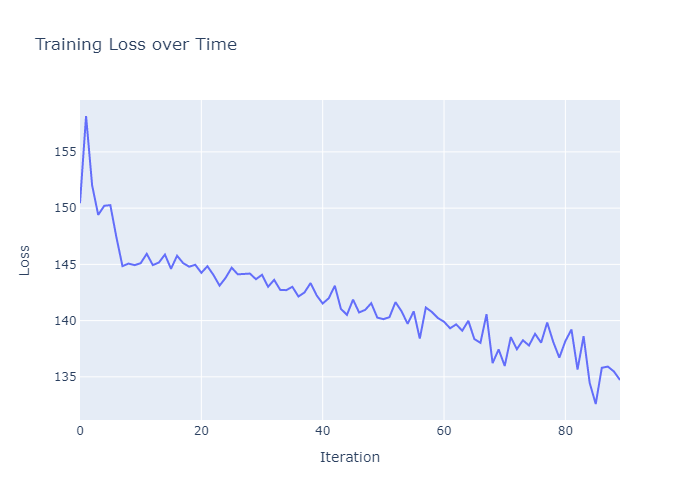

In [42]:
img_bytes = pio.to_image(fig, format="png")
Image(img_bytes)

3. Implement the same network in PyTorch (or any other framework). You can use all the features of the framework e.g. auto-grad etc. Evaluate it on MNIST dataset, report test errors, and learning curve. (2 pts)   

In [26]:
# Load the training and test datasets
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


In [27]:
# Define the Network Architecture with Sigmoid for hidden layers
class NeuralNetworkSigmoid(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(NeuralNetworkSigmoid, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.sigmoid = nn.Sigmoid()
        
        # Xavier (Glorot) Initialization for Sigmoid
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
    
    def forward(self, x):
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        x = self.fc3(x)  # removed softmax here
        return x

# Initialize the network with the specified dimensions
model_sigmoid = NeuralNetworkSigmoid(28*28, 300, 200, 10)

In [28]:
# Set Loss Function and Optimizer
learning_rate = 0.01
optimizer = optim.SGD(model_sigmoid.parameters(), lr=learning_rate)  # SGD without momentum

In [29]:
# Train the Network
num_epochs = 10
loss_list_sigmoid = []
criterion = nn.CrossEntropyLoss()

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model_sigmoid(images)
        
        # Calculate loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item()}')
            loss_list_sigmoid.append(loss.item())

Epoch [1/10], Step [100/938], Loss: 2.292510747909546
Epoch [1/10], Step [200/938], Loss: 2.2745885848999023
Epoch [1/10], Step [300/938], Loss: 2.236137866973877
Epoch [1/10], Step [400/938], Loss: 2.2385945320129395
Epoch [1/10], Step [500/938], Loss: 2.246877431869507
Epoch [1/10], Step [600/938], Loss: 2.2270617485046387
Epoch [1/10], Step [700/938], Loss: 2.2525980472564697
Epoch [1/10], Step [800/938], Loss: 2.221071243286133
Epoch [1/10], Step [900/938], Loss: 2.1858716011047363
Epoch [2/10], Step [100/938], Loss: 2.1568338871002197
Epoch [2/10], Step [200/938], Loss: 2.119809150695801
Epoch [2/10], Step [300/938], Loss: 2.0830423831939697
Epoch [2/10], Step [400/938], Loss: 2.0672149658203125
Epoch [2/10], Step [500/938], Loss: 1.9432536363601685
Epoch [2/10], Step [600/938], Loss: 1.9893263578414917
Epoch [2/10], Step [700/938], Loss: 1.715041160583496
Epoch [2/10], Step [800/938], Loss: 1.8554497957229614
Epoch [2/10], Step [900/938], Loss: 1.6881569623947144
Epoch [3/10], St

In [30]:
# Test the Network
correct_sigmoid = 0
total_sigmoid = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        outputs = model_sigmoid(images)
        _, predicted = torch.max(outputs.data, 1)
        total_sigmoid += labels.size(0)
        correct_sigmoid += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct_sigmoid / total_sigmoid} %')
print(f'Number of parameters in the network: {sum(p.numel() for p in model_sigmoid.parameters())}')
print(f'Hyperparameters: {num_epochs}, {batch_size}, {learning_rate}')

Accuracy of the network on the 10000 test images: 88.89 %
Number of parameters in the network: 297710
Hyperparameters: 10, 64, 0.01


In [43]:
# Create the figure
fig = go.Figure()

# Add the loss curve data
fig.add_trace(go.Scatter(y=loss_list_sigmoid, mode='lines', name='Loss'))

# Set the layout for the figure
fig.update_layout(
    title='Training Loss over Time',
    xaxis_title='Iteration',
    yaxis_title='Loss',
    xaxis=dict(showgrid=True, showline=True, showticklabels=True),
    yaxis=dict(showgrid=True, showline=True, showticklabels=True)
)

# Display the figure
fig.show()

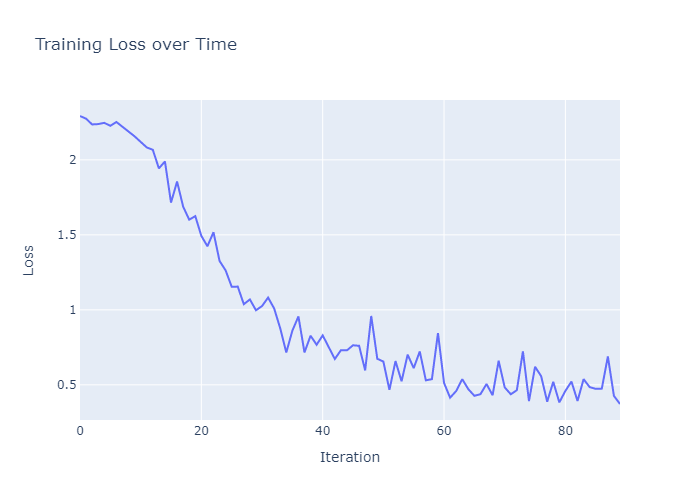

In [44]:
img_bytes = pio.to_image(fig, format="png")
Image(img_bytes)

4. Try different weight initialization a) all weights initialized to 0, and b) initialize the weights randomly between -1 and 1. Report test error and learning curves for both. (You can use either of the implementations) (3 pts)

In [32]:
# Load the training and test datasets
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


In [33]:
# Define the Network Architecture with Sigmoid for hidden layers
class NeuralNetworkSigmoid(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(NeuralNetworkSigmoid, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

In [34]:
# Define custom weight initializations
def zero_weights_initialization(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            nn.init.constant_(m.weight, 0)
            nn.init.constant_(m.bias, 0)

def random_weights_initialization(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            nn.init.uniform_(m.weight, -1, 1)
            nn.init.uniform_(m.bias, -1, 1)

# Initialize models and apply custom weight initializations
model_zero = NeuralNetworkSigmoid(28*28, 300, 200, 10)
model_random = NeuralNetworkSigmoid(28*28, 300, 200, 10)

zero_weights_initialization(model_zero)
random_weights_initialization(model_random)

In [35]:
# Training function
def train_model(model, num_epochs=10):
    learning_rate = 0.01
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    loss_list = []

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            images = images.view(-1, 28*28)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            if (i+1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item()}')
                loss_list.append(loss.item())
                
    return loss_list

# Testing function
def test_model(model):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(-1, 28*28)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return 100 * correct / total

In [36]:
# Train and test functions remain the same ...

loss_list_zero = train_model(model_zero)
loss_list_random = train_model(model_random)

accuracy_zero = test_model(model_zero)
accuracy_random = test_model(model_random)

print(f'Accuracy with Zero Initialization: {accuracy_zero} %')
print(f'Number of parameters in the network: {sum(p.numel() for p in model_zero.parameters())}')
print(f'Hyperparameters: {num_epochs}, {batch_size}, {learning_rate}')

Epoch [1/10], Step [100/938], Loss: 2.2959036827087402
Epoch [1/10], Step [200/938], Loss: 2.3098185062408447
Epoch [1/10], Step [300/938], Loss: 2.2983412742614746
Epoch [1/10], Step [400/938], Loss: 2.300004243850708
Epoch [1/10], Step [500/938], Loss: 2.324035882949829
Epoch [1/10], Step [600/938], Loss: 2.2947351932525635
Epoch [1/10], Step [700/938], Loss: 2.300985813140869
Epoch [1/10], Step [800/938], Loss: 2.2945473194122314
Epoch [1/10], Step [900/938], Loss: 2.2986879348754883
Epoch [2/10], Step [100/938], Loss: 2.2957682609558105
Epoch [2/10], Step [200/938], Loss: 2.3193600177764893
Epoch [2/10], Step [300/938], Loss: 2.3031725883483887
Epoch [2/10], Step [400/938], Loss: 2.308579444885254
Epoch [2/10], Step [500/938], Loss: 2.313770055770874
Epoch [2/10], Step [600/938], Loss: 2.291682481765747
Epoch [2/10], Step [700/938], Loss: 2.3063442707061768
Epoch [2/10], Step [800/938], Loss: 2.308854103088379
Epoch [2/10], Step [900/938], Loss: 2.3122706413269043
Epoch [3/10], Ste

In [37]:
print(f'Accuracy with Random Initialization: {accuracy_random} %')
print(f'Number of parameters in the network: {sum(p.numel() for p in model_random.parameters())}')
print(f'Hyperparameters: {num_epochs}, {batch_size}, {learning_rate}')

Accuracy with Random Initialization: 85.8 %
Number of parameters in the network: 297710
Hyperparameters: 10, 64, 0.01


In [45]:
# Create the figure
fig = go.Figure()

# Add the loss curve data for both initializations
fig.add_trace(go.Scatter(y=loss_list_zero, mode='lines', name='Zero Initialization'))
fig.add_trace(go.Scatter(y=loss_list_random, mode='lines', name='Random Initialization'))

# Set the layout for the figure
fig.update_layout(
    title='Training Loss over Time',
    xaxis_title='Iteration',
    yaxis_title='Loss',
    xaxis=dict(showgrid=True, showline=True, showticklabels=True),
    yaxis=dict(showgrid=True, showline=True, showticklabels=True)
)

# Display the figure
fig.show()

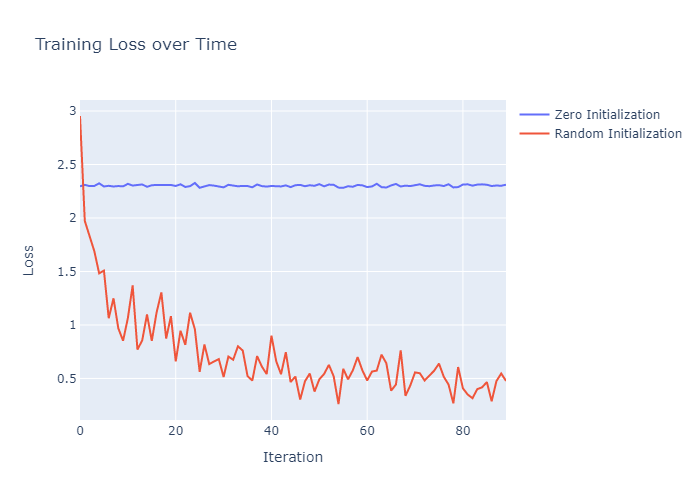

In [46]:
img_bytes = pio.to_image(fig, format="png")
Image(img_bytes)